In [1]:
%autosave 0

Autosave disabled


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img

2023-11-19 12:24:36.936943: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Dataset: download and preparation

In [10]:
# https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

In [8]:
!ls data/train/bee

data/train/bee:
20997149292_3b5fd09795_m.jpg	 4502758983_67e9d57170_n.jpg
21004953130_03d69a5dee_w.jpg	 4512990458_ed2ba52dfa_m.jpg
210144361_aac82685de_n.jpg	 4531461356_6bf78893b3_n.jpg
210210150_4d7e48e5f6_w.jpg	 45377270562_702760d0c2_n.jpg
21041075712_6d1d2fd99c_m.jpg	 4544074246_5380468d24_n.jpg
21044178535_e8f69f29c1_n.jpg	 4549780036_c03515a4d4_m.jpg
21057431504_b78db22151_m.jpg	 45501237152_0fe30711bc_w.jpg
212308696_3a448e2fde_n.jpg	 45502481772_3caa75361c_n.jpg
21362384671_b60ae3cf3f_w.jpg	 4551971928_0c403c845d_n.jpg
21383559785_59808e98f5_m.jpg	 4551971928_0c403c845d_w.jpg
21502149152_0f8118e66d_n.jpg	 4552332738_b9e7170475_w.jpg
21543926312_b2dc00c7b8_n.jpg	 45553954872_ff97a2b15a_n.jpg
21543926312_b2dc00c7b8_w.jpg	 45580182535_1b0e048078_m.jpg
21546842900_fdf084dab3_n.jpg	 45636471655_2667c74b51_n.jpg
21571844_e971a46579_n.jpg	 45636475395_4b5a0ea7cb_w.jpg
21571877_3d13655161_m.jpg	 45636476255_72d464f105_n.jpg
215851836_be4c2b33e0_w.jpg	 45636478735_34fd1c1938_n.jpg
216

# Data

In [10]:
!ls /home/triasteran/ML/08-nn/data/train/bee/ 

20997149292_3b5fd09795_m.jpg	 4502758983_67e9d57170_n.jpg
21004953130_03d69a5dee_w.jpg	 4512990458_ed2ba52dfa_m.jpg
210144361_aac82685de_n.jpg	 4531461356_6bf78893b3_n.jpg
210210150_4d7e48e5f6_w.jpg	 45377270562_702760d0c2_n.jpg
21041075712_6d1d2fd99c_m.jpg	 4544074246_5380468d24_n.jpg
21044178535_e8f69f29c1_n.jpg	 4549780036_c03515a4d4_m.jpg
21057431504_b78db22151_m.jpg	 45501237152_0fe30711bc_w.jpg
212308696_3a448e2fde_n.jpg	 45502481772_3caa75361c_n.jpg
21362384671_b60ae3cf3f_w.jpg	 4551971928_0c403c845d_n.jpg
21383559785_59808e98f5_m.jpg	 4551971928_0c403c845d_w.jpg
21502149152_0f8118e66d_n.jpg	 4552332738_b9e7170475_w.jpg
21543926312_b2dc00c7b8_n.jpg	 45553954872_ff97a2b15a_n.jpg
21543926312_b2dc00c7b8_w.jpg	 45580182535_1b0e048078_m.jpg
21546842900_fdf084dab3_n.jpg	 45636471655_2667c74b51_n.jpg
21571844_e971a46579_n.jpg	 45636475395_4b5a0ea7cb_w.jpg
21571877_3d13655161_m.jpg	 45636476255_72d464f105_n.jpg
215851836_be4c2b33e0_w.jpg	 45636478735_34fd1c1938_n.jpg
21608346345_cf4e0e1

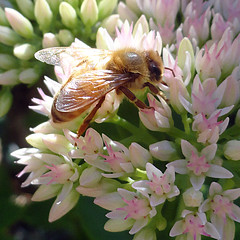

In [12]:
path = '/home/triasteran/ML/08-nn/data/train/bee'
name = '20997149292_3b5fd09795_m.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

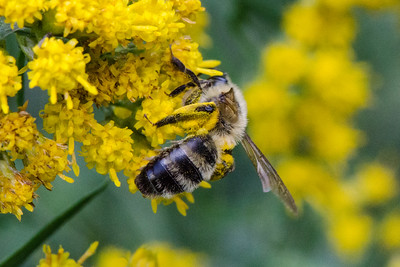

In [13]:
path = '/home/triasteran/ML/08-nn/data/train/bee'
name = '45636475395_4b5a0ea7cb_w.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

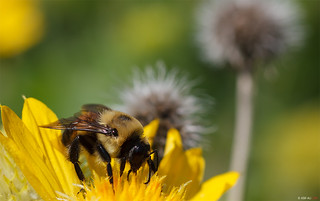

In [14]:
path = '/home/triasteran/ML/08-nn/data/train/bee'
name = '21543926312_b2dc00c7b8_n.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [17]:
img = load_img(fullname, target_size=(150, 150))
x = np.array(img)
x.shape

(150, 150, 3)

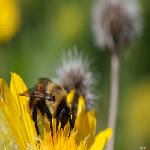

In [18]:
img

# Model (from scratch)

In [ ]:
The shape for input should be (150, 150, 3)
Next, create a convolutional layer (Conv2D):
Use 32 filters
Kernel size should be (3, 3) (that's the size of the filter)
Use 'relu' as activation
Reduce the size of the feature map with max pooling (MaxPooling2D)
Set the pooling size to (2, 2)
Turn the multi-dimensional result into vectors using a Flatten layer
Next, add a Dense layer with 64 neurons and 'relu' activation
Finally, create the Dense layer with 1 neuron - this will be the output
The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use SGD with the following parameters:

SGD(lr=0.002, momentum=0.8)

In [61]:
#create model
model = Sequential()

#add model layers
# 32 filters
# kernel size (3,3)
# relu activation
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150,150,3)))

# pooling: MaxPooling2D 
#Set the pooling size to (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Turn the multi-dimensional result into vectors using a Flatten layer
model.add(Flatten())

# Next, add a Dense layer with 64 neurons and 'relu' activation 
model.add(Dense(64, activation='relu'))

# Finally, create the Dense layer with 1 neuron - this will be the output 
model.add(Dense(1, activation='sigmoid'))

In [62]:
# As optimizer use SGD with the following parameters:
# 
opt = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy(from_logits=False)

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

# Q1: binary crossentropy

In [ ]:
Since we have a binary classification problem, what is the best loss function for us?

# Q2: 896

In [31]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 175232)            0         
                                                                 
 dense_4 (Dense)             (None, 64)                11214912  
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

# Data Generation 

In [33]:
# ImageDataGenerator(rescale=1./255)
# We don't need to do any additional pre-processing for the images.
# When reading the data from train/test directories, check the class_mode parameter. Which value should it be for a binary classification problem?
# Use batch_size=20
# Use shuffle=True for both training and test sets.

In [63]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    '/home/triasteran/ML/08-nn/data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

Found 3677 images belonging to 2 classes.


In [64]:
train_ds

In [65]:
test_gen = ImageDataGenerator(rescale=1./255)

test_ds = test_gen.flow_from_directory(
    '/home/triasteran/ML/08-nn/data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

Found 918 images belonging to 2 classes.


In [66]:
train_ds.class_indices

{'bee': 0, 'wasp': 1}

In [67]:
X, y = next(train_ds)

In [68]:
X

array([[[[0.7803922 , 0.6862745 , 0.82745105],
         [0.7411765 , 0.654902  , 0.7960785 ],
         [0.8313726 , 0.77647066, 0.8431373 ],
         ...,
         [0.78823537, 0.8000001 , 0.86666673],
         [0.8000001 , 0.7960785 , 0.85098046],
         [0.8078432 , 0.81568635, 0.86666673]],

        [[0.7803922 , 0.69803923, 0.8196079 ],
         [0.7568628 , 0.67058825, 0.8117648 ],
         [0.8313726 , 0.7843138 , 0.86274517],
         ...,
         [0.80392164, 0.81568635, 0.8745099 ],
         [0.8705883 , 0.8705883 , 0.9176471 ],
         [0.8862746 , 0.8862746 , 0.9333334 ]],

        [[0.8431373 , 0.7725491 , 0.8588236 ],
         [0.74509805, 0.6627451 , 0.7843138 ],
         [0.82745105, 0.8000001 , 0.86274517],
         ...,
         [0.82745105, 0.8352942 , 0.8862746 ],
         [0.87843144, 0.87843144, 0.92549026],
         [0.89019614, 0.89019614, 0.9294118 ]],

        ...,

        [[0.8117648 , 0.8078432 , 0.83921576],
         [0.80392164, 0.8000001 , 0.8313726 ]

In [69]:
y

array([1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1.,
       1., 1., 1.], dtype=float32)

In [70]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10


2023-11-19 15:20:42.624056: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


184/184 [==============================] - ETA: 0s - loss: 0.6994 - accuracy: 0.5298

2023-11-19 15:21:05.793331: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


184/184 [==============================] - 26s 139ms/step - loss: 0.6994 - accuracy: 0.5298 - val_loss: 0.6888 - val_accuracy: 0.5370
Epoch 2/10
184/184 [==============================] - 27s 149ms/step - loss: 0.6861 - accuracy: 0.5412 - val_loss: 0.6717 - val_accuracy: 0.6296
Epoch 3/10
184/184 [==============================] - 28s 150ms/step - loss: 0.6670 - accuracy: 0.5970 - val_loss: 0.6324 - val_accuracy: 0.6427
Epoch 4/10
184/184 [==============================] - 29s 159ms/step - loss: 0.6371 - accuracy: 0.6318 - val_loss: 0.6107 - val_accuracy: 0.6275
Epoch 5/10
184/184 [==============================] - 28s 154ms/step - loss: 0.5957 - accuracy: 0.6818 - val_loss: 0.5890 - val_accuracy: 0.6688
Epoch 6/10
184/184 [==============================] - 29s 159ms/step - loss: 0.5588 - accuracy: 0.7193 - val_loss: 0.5867 - val_accuracy: 0.6721
Epoch 7/10
184/184 [==============================] - 27s 147ms/step - loss: 0.5350 - accuracy: 0.7370 - val_loss: 0.5416 - val_accuracy: 0.7

# Question 3

In [ ]:
What is the median of training accuracy for all the epochs for this model?

In [71]:
history.history

{'loss': [0.6994348764419556,
  0.6860833764076233,
  0.6669730544090271,
  0.6370744109153748,
  0.595738410949707,
  0.5587552189826965,
  0.5349670648574829,
  0.5150748491287231,
  0.4871298670768738,
  0.4701731204986572],
 'accuracy': [0.5297797322273254,
  0.5412020683288574,
  0.5969540476799011,
  0.6317650079727173,
  0.6818058490753174,
  0.7193363904953003,
  0.7370138764381409,
  0.748708188533783,
  0.7753603458404541,
  0.781887412071228],
 'val_loss': [0.6888288259506226,
  0.6716785430908203,
  0.6324374079704285,
  0.6106697916984558,
  0.5890154242515564,
  0.5867065191268921,
  0.5416057109832764,
  0.5378282070159912,
  0.5118008255958557,
  0.5162665843963623],
 'val_accuracy': [0.5370370149612427,
  0.6296296119689941,
  0.6427015066146851,
  0.6274510025978088,
  0.6688452959060669,
  0.672113299369812,
  0.7516340017318726,
  0.7265795469284058,
  0.7679738402366638,
  0.7625272274017334]}

In [74]:
np.median(history.history['accuracy'])

0.7005711197853088

# Question 4: the closest 0.091

In [ ]:
What is the standard deviation of training loss for all the epochs for this model? 

In [75]:
np.std(history.history['loss'])

0.0798154227953407

# Data Augmentation

In [ ]:
Add the following augmentations to your training data generator:



In [76]:
train_gen = ImageDataGenerator(rescale=1./255,
                              rotation_range=50,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

train_ds = train_gen.flow_from_directory(
    '/home/triasteran/ML/08-nn/data/train',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

Found 3677 images belonging to 2 classes.


In [77]:
test_gen = ImageDataGenerator(rescale=1./255, 
                             rotation_range=50,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip=True,
                              fill_mode='nearest')

test_ds = test_gen.flow_from_directory(
    '/home/triasteran/ML/08-nn/data/test',
    target_size=(150, 150),
    batch_size=20,
    shuffle=True,  class_mode='binary'
)

Found 918 images belonging to 2 classes.


In [78]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)

Epoch 1/10
  1/184 [..............................] - ETA: 32s - loss: 0.5277 - accuracy: 0.7500

2023-11-19 15:30:03.934993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


184/184 [==============================] - ETA: 0s - loss: 0.5175 - accuracy: 0.7550

2023-11-19 15:30:41.171039: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


184/184 [==============================] - 45s 243ms/step - loss: 0.5175 - accuracy: 0.7550 - val_loss: 0.5740 - val_accuracy: 0.7179
Epoch 2/10
184/184 [==============================] - 47s 257ms/step - loss: 0.5162 - accuracy: 0.7482 - val_loss: 0.5067 - val_accuracy: 0.7810
Epoch 3/10
184/184 [==============================] - 50s 272ms/step - loss: 0.4980 - accuracy: 0.7653 - val_loss: 0.4954 - val_accuracy: 0.7778
Epoch 4/10
184/184 [==============================] - 54s 292ms/step - loss: 0.4960 - accuracy: 0.7593 - val_loss: 0.5334 - val_accuracy: 0.7407
Epoch 5/10
184/184 [==============================] - 51s 277ms/step - loss: 0.4929 - accuracy: 0.7661 - val_loss: 0.5477 - val_accuracy: 0.7190
Epoch 6/10
184/184 [==============================] - 51s 277ms/step - loss: 0.4847 - accuracy: 0.7745 - val_loss: 0.4686 - val_accuracy: 0.7821
Epoch 7/10
184/184 [==============================] - 54s 295ms/step - loss: 0.4818 - accuracy: 0.7797 - val_loss: 0.4741 - val_accuracy: 0.7

# Question 5

In [ ]:
What is the mean of test loss for all the epochs for the model trained with augmentations?

In [79]:
np.mean(history.history['val_loss'])

0.5070030391216278

# Question 6

In [ ]:
What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [ ]:
np.mean(history.history['val_accuracy'][6:10])